# Convolutional Neural Network
![Convolutional Neural Network](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)
![Convolutional Neural Network](https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

## Image Kernel
Visit [here](https://setosa.io/ev/image-kernels) and https://www.cs.ryerson.ca/~aharley/vis/conv/


## Project Fashion Classification
Train cnn on 60000 Fashion-MNIST Images (data in np array)

Test CNN on 10000 Fashion MNIST Images (data in np array)

### Import libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Load the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(f"X-train shape: {X_train.shape} & y-train shape {y_train.shape}")

X-train shape: (60000, 28, 28) & y-train shape (60000,)


In [4]:
print(f"X-test shape: {X_test.shape} & y-test shape {y_test.shape}")

X-test shape: (10000, 28, 28) & y-test shape (10000,)


In [5]:
X_train[0]  # Single image (first image), black=255 & while=0

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]  # label of 1st image (9 means ankle boot)

9

In [7]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
"""
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot
"""

'\n0 => T-shirt/top\n1 => Trouser\n2 => Pullover\n3 => Dress\n4 => Coat\n5 => Sandal\n6 => Shirt\n7 => Sneaker\n8 => Bag\n9 => Ankle boot\n'

### Show Image

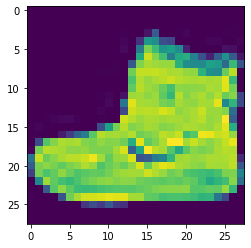

In [8]:
plt.imshow(X_train[0])
plt.show()

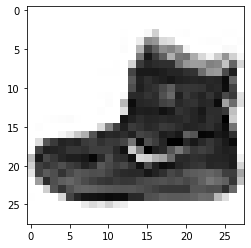

In [9]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

Label: 9


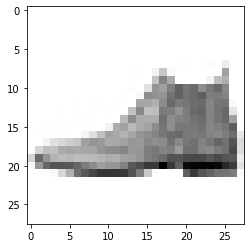

In [10]:
print(f"Label: {y_test[0]}")
plt.imshow(X_test[0], cmap="Greys")
plt.show()

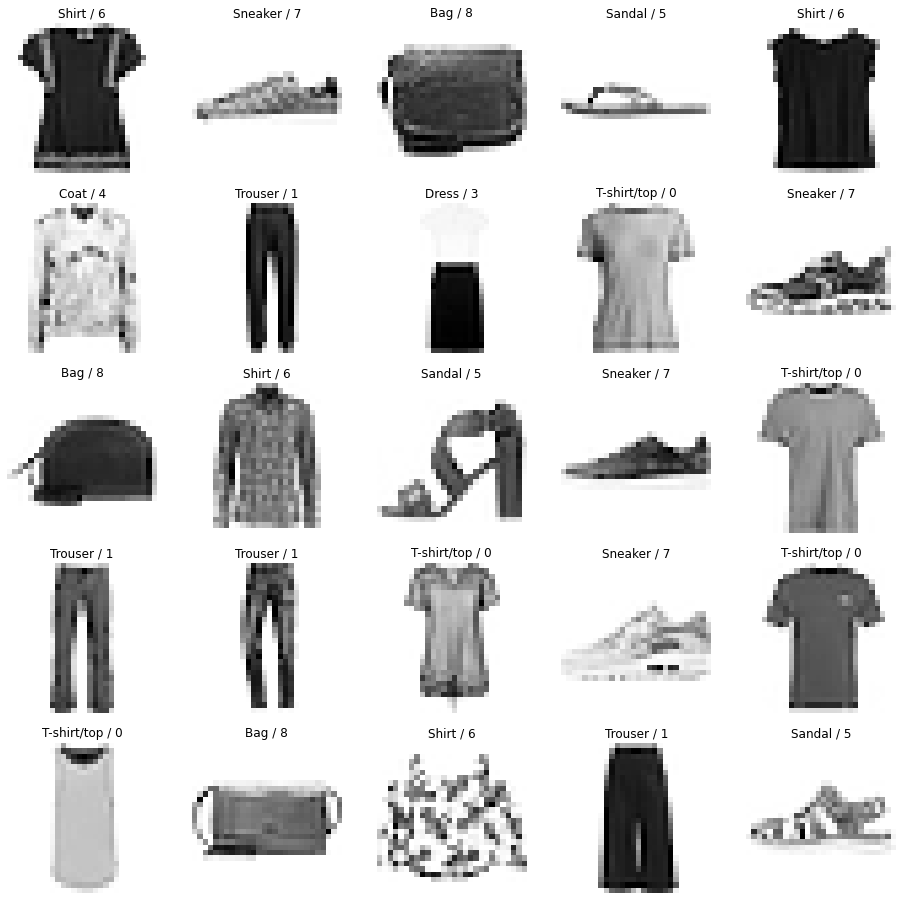

In [11]:
plt.figure(figsize=(16, 16))

j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j); j+=1
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
    plt.title(f"{class_labels[y_train[i]]} / {y_train[i]}")

plt.show()

### Change dimension (CNN expect 4 dim values)

In [12]:
print("Dimension of X-train", X_train.ndim)  # 3 dimension because images are in black-white format
print("Shape of X-train", X_train.shape)

Dimension of X-train 3
Shape of X-train (60000, 28, 28)


In [13]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("Dimension of X-train after changes is ", X_train.ndim)
print("Shape of X-train after changes is ", X_train.shape)

Dimension of X-train after changes is  4
Shape of X-train after changes is  (60000, 28, 28, 1)


### Feature Scaling

In [14]:
X_train = X_train/255
X_test = X_test/255

### Split Dataset

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2020)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (48000, 28, 28, 1)
y_train shape:  (48000,)


In [16]:
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

X_val shape:  (12000, 28, 28, 1)
y_val shape:  (12000,)


### CNN Model Building

In [17]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [18]:
model.summary()  # Our model summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


### Compile & Train the Model

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
94/94 [==============================] - 11s 51ms/step - loss: 0.6204 - accuracy: 0.7905 - val_loss: 0.4307 - val_accuracy: 0.8462
Epoch 2/10
94/94 [==============================] - 9s 99ms/step - loss: 0.3715 - accuracy: 0.8692 - val_loss: 0.3542 - val_accuracy: 0.8758
Epoch 3/10
94/94 [==============================] - 9s 98ms/step - loss: 0.3209 - accuracy: 0.8879 - val_loss: 0.3212 - val_accuracy: 0.8894
Epoch 4/10
94/94 [==============================] - 9s 99ms/step - loss: 0.2931 - accuracy: 0.8966 - val_loss: 0.3127 - val_accuracy: 0.8922
Epoch 5/10
94/94 [==============================] - 9s 100ms/step - loss: 0.2733 - accuracy: 0.9030 - val_loss: 0.3256 - val_accuracy: 0.8868
Epoch 6/10
94/94 [==============================] - 9s 99ms/step - loss: 0.2597 - accuracy: 0.9072 - val_loss: 0.3065 - val_accuracy: 0.8924
Epoch 7/10
94/94 [==============================] - 9s 99ms/step - loss: 0.2419 - accuracy: 0.9129 - val_loss: 0.2755 - val_accuracy: 0.9052
Epoch 8/10


### Test the Model

In [23]:
# Expect 4 dimensional value because we train the model on 4 dimensional
model.predict(np.expand_dims(X_test[0], axis=0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [24]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(2))  # predicted value

9

In [25]:
y_test[0]  # actual value

9

In [26]:
y_pred = model.predict(X_test).round(2)
y_pred

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.14, 0.04, 0.01]], dtype=float32)

### Evaluate the Model

In [27]:
model.evaluate(X_test, y_test)  # accuracy is 89.83%

313/313 [==============================] - 1s 3ms/step - loss: 0.2803 - accuracy: 0.8983


[0.2803102433681488, 0.8982999920845032]

### Visualize Output

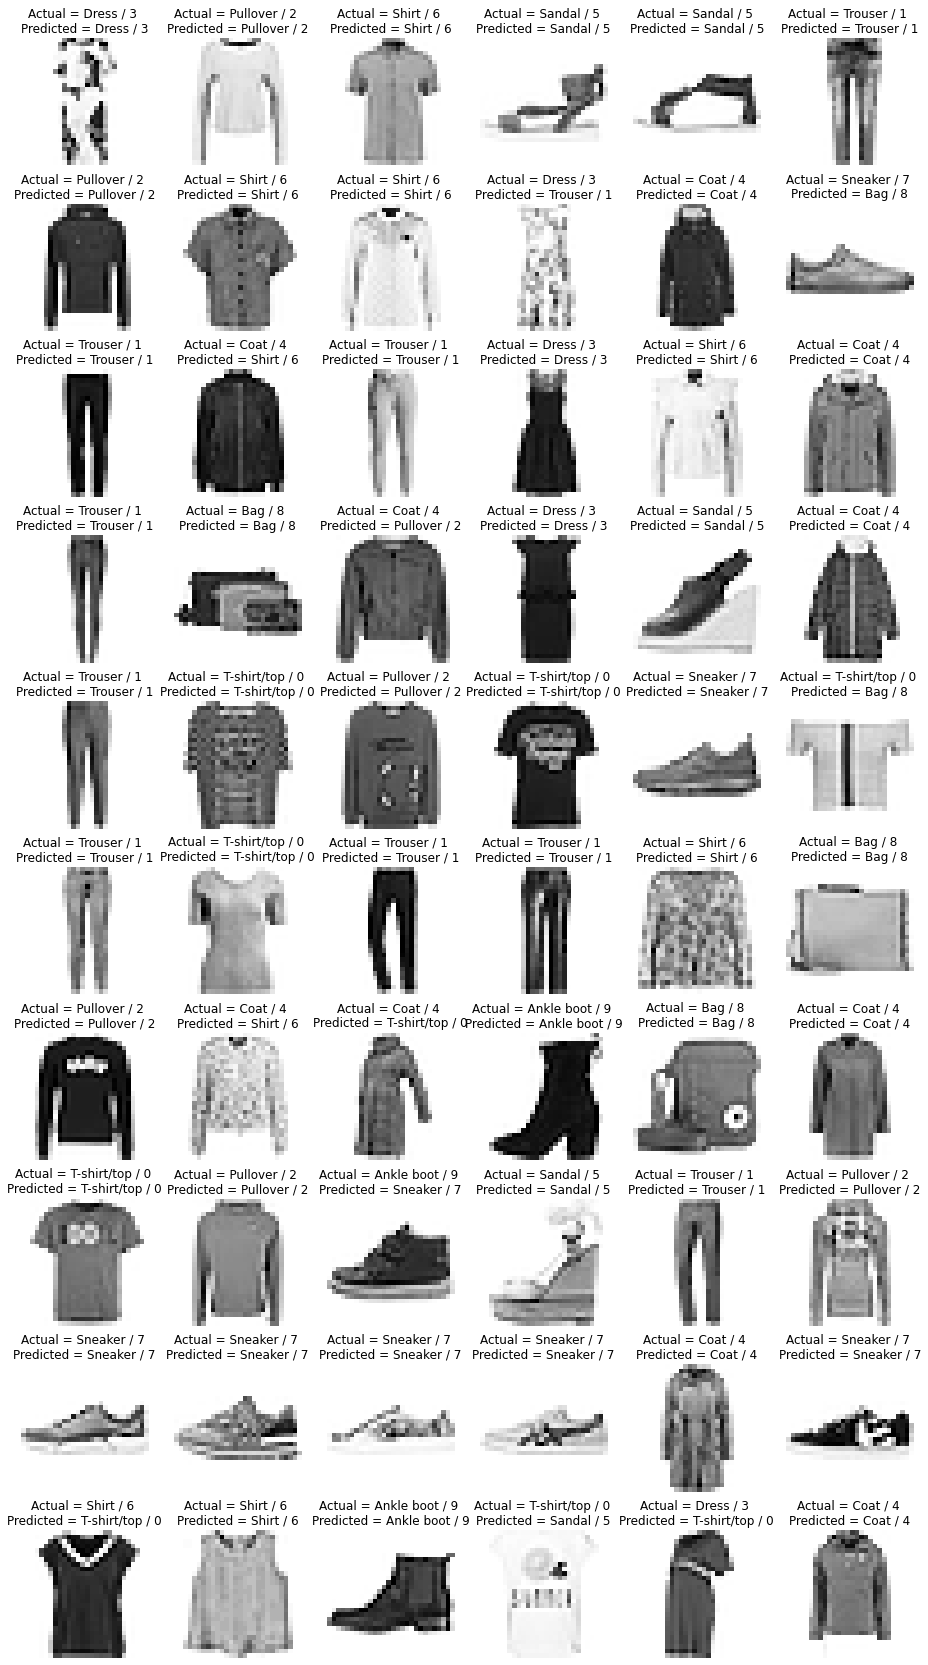

In [28]:
plt.figure(figsize=(16, 30))

j=1
for i in np.random.randint(0, 1000, 60):
    plt.subplot(10, 6, j); j+=1
    plt.imshow(X_test[i].reshape(28, 28), cmap="Greys")
    plt.title(f"Actual = {class_labels[y_test[i]]} / {y_test[i]} \nPredicted = {class_labels[np.argmax(y_pred[i])]} / {np.argmax(y_pred[i])}")
    plt.axis('off')

plt.show()

### Confusion Matrix

<AxesSubplot:>

<Figure size 1152x648 with 0 Axes>

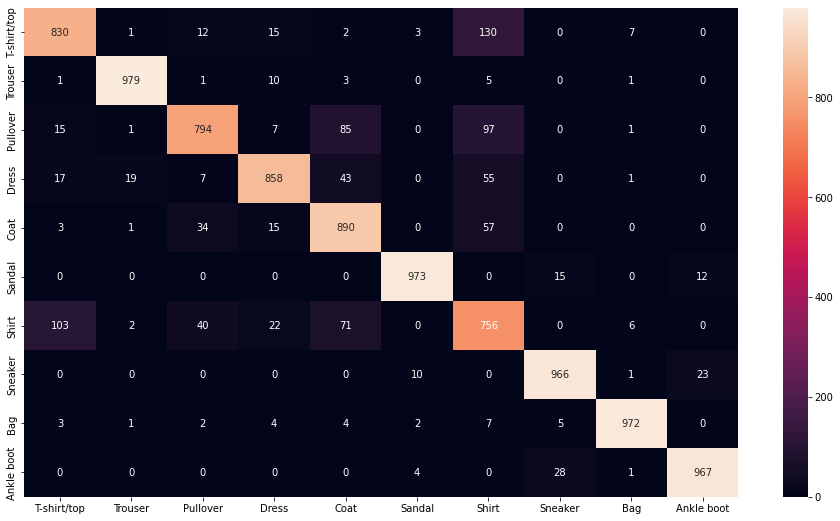

In [30]:
plt.figure(figsize=(16, 9))

plt.figure(figsize=(16, 9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

# show confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

$$Precision = \frac{True Positive}{True Positive + False Positive}$$


$$Recall = \frac{True Positive}{True Positive + False Negative}$$

In [32]:
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.83      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.89      0.79      0.84      1000
       Dress       0.92      0.86      0.89      1000
        Coat       0.81      0.89      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.68      0.76      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

